In [122]:
pip install --upgrade pandas

Requirement already up-to-date: pandas in c:\users\katie\anaconda3\lib\site-packages (1.2.4)
Note: you may need to restart the kernel to use updated packages.


In [124]:
import pandas as pd
pd.__version__

'1.2.4'

In [125]:
import os, types
import io, requests
from datetime import datetime

In [126]:
import matplotlib.pyplot as plt

In [127]:
# 2.1 Import dataset from github using Pandas

In [128]:
url = "https://raw.githubusercontent.com/WiDSTexas2021/datathon-code/main/data/ercot_hourly_load.csv"
s=requests.get(url).content
ercot_hourly_df =pd.read_csv(io.StringIO(s.decode('utf-8')))

In [92]:
# 2.2 - Data exploration

In [123]:
ercot_hourly_df.columns

Index(['Hour_Ending', 'Coast', 'East', 'Far West', 'North', 'North Central',
       'South', 'South Central', 'West'],
      dtype='object')

In [129]:
ercot_hourly_df.head()

Hour_Ending        Coast        East    Far West       North  \
0  2005-01-01 01:00:00-06:00  7507.810731  850.313988  998.465500  741.963778   
1  2005-01-01 02:00:00-06:00  7257.549136  818.143264  987.532852  711.996586   
2  2005-01-01 03:00:00-06:00  6973.987199  783.396624  978.575662  687.881144   
3  2005-01-01 04:00:00-06:00  6794.489296  760.639635  959.486947  673.419383   
4  2005-01-01 05:00:00-06:00  6685.186677  743.371691  955.268590  664.792118   

   North Central        South  South Central        West  
0    7312.259820  1883.979457    3728.400885  692.294503  
1    7012.466197  1798.234153    3562.614723  675.176013  
2    6712.807281  1712.758395    3373.868049  659.650453  
3    6502.378446  1651.210254    3239.047417  648.512894  
4    6440.559639  1627.872766    3176.859720  647.001780

In [130]:
ercot_hourly_df.dtypes

Hour_Ending       object
Coast            float64
East             float64
Far West         float64
North            float64
North Central    float64
South            float64
South Central    float64
West             float64
dtype: object

In [96]:
ercot_hourly_df['Hour_Ending'].dtype

dtype('O')

In [131]:
ercot_hourly_describe = ercot_hourly_df.describe()
ercot_hourly_describe

Coast           East       Far West          North  \
count  143734.000000  143734.000000  143734.000000  143734.000000   
mean    11008.580913    1407.947949    1951.418378     913.964023   
std      2631.977461     333.874194     854.141886     256.532687   
min      1702.829343     737.857378     872.014264     488.272293   
25%      9120.661141    1175.174448    1259.003408     731.190616   
50%     10460.852618    1336.755405    1657.275777     846.757203   
75%     12449.639107    1589.192852    2390.133858    1037.283970   
max     21256.115190    2949.198517    4438.851497    2305.722761   

       North Central          South  South Central           West  
count  143734.000000  143734.000000  143734.000000  143734.000000  
mean    12638.822714    3063.212370    6309.424542    1082.688740  
std      3492.269134     840.368895    1723.029397     251.769500  
min      6211.523935    1351.410393    3055.595655     571.771569  
25%     10233.402052    2436.591650    5101.895882     899.879117  
50%     11798.962900    2919.142968    5904.795089    1041.094163  
75%     14418.272028    3556.413682    7220.833143    1222.806950  
max     26499.240955    6192.252947   14166.701623    2117.399078

<AxesSubplot:>

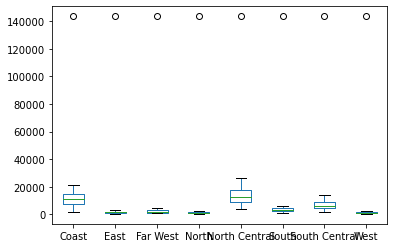

In [98]:
ercot_hourly_describe.plot.box()

In [25]:
# 2.3 Handle missing data

In [99]:
ercot_hourly_df.isna().any()

Hour_Ending      False
Coast             True
East              True
Far West          True
North             True
North Central     True
South             True
South Central     True
West              True
dtype: bool

In [132]:
ercot_hourly_df[ercot_hourly_df.isna().any(axis=1)]

Hour_Ending  Coast  East  Far West  North  \
103871  2016-11-07 00:00:00-06:00    NaN   NaN       NaN    NaN   

        North Central  South  South Central  West  
103871            NaN    NaN            NaN   NaN

In [133]:
ercot_hourly_df = ercot_hourly_df.fillna(method='ffill')

In [134]:
ercot_hourly_df[ercot_hourly_df.isna().any(axis=1)]

Empty DataFrame
Columns: [Hour_Ending, Coast, East, Far West, North, North Central, South, South Central, West]
Index: []

In [31]:
# 2.4 - datetime - change from offset-aware to offset-naive

In [104]:
ercot_hourly_df['Hour_Ending']

0         2005-01-01 01:00:00-06:00
1         2005-01-01 02:00:00-06:00
2         2005-01-01 03:00:00-06:00
3         2005-01-01 04:00:00-06:00
4         2005-01-01 05:00:00-06:00
                    ...            
143730    2021-05-25 20:00:00-05:00
143731    2021-05-25 21:00:00-05:00
143732    2021-05-25 22:00:00-05:00
143733    2021-05-25 23:00:00-05:00
143734    2021-05-26 00:00:00-05:00
Name: Hour_Ending, Length: 143735, dtype: object

In [135]:
ercot_hourly_df['Hour_Ending_Naive'] = ercot_hourly_df['Hour_Ending'].apply(lambda x: datetime.fromtimestamp(datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S%z').timestamp()))

In [136]:
ercot_hourly_df = ercot_hourly_df.drop(['Hour_Ending'],axis=1)

In [137]:
ercot_hourly_df['Hour_Ending_Naive']

0        2004-12-31 23:00:00
1        2005-01-01 00:00:00
2        2005-01-01 01:00:00
3        2005-01-01 02:00:00
4        2005-01-01 03:00:00
                 ...        
143730   2021-05-25 18:00:00
143731   2021-05-25 19:00:00
143732   2021-05-25 20:00:00
143733   2021-05-25 21:00:00
143734   2021-05-25 22:00:00
Name: Hour_Ending_Naive, Length: 143735, dtype: datetime64[ns]

In [36]:
# 2.5 . Index and filter datetime column to match with historical weather dataset

In [138]:
ercot_hourly_df = ercot_hourly_df.set_index(['Hour_Ending_Naive'])

In [109]:
print(len(ercot_hourly_df))

143735


In [139]:
starting_timestamp = '2008-07-01 00:00:00'
ending_timestamp = ercot_hourly_df.index[-1]
print(ending_timestamp)
ercot_hourly_df = ercot_hourly_df[pd.Timestamp(starting_timestamp):pd.Timestamp(ending_timestamp)]

2021-05-25 22:00:00


In [140]:
ercot_hourly_df.head(30)

Coast         East     Far West        North  \
Hour_Ending_Naive                                                          
2008-07-01 00:00:00   9656.662104  1221.128539  1178.877662  1050.738480   
2008-07-01 01:00:00   9253.200129  1172.281951  1154.309255   991.552786   
2008-07-01 02:00:00   9018.471792  1130.034847  1136.704381   951.264219   
2008-07-01 03:00:00   9001.706612  1088.946217  1141.788394   933.279239   
2008-07-01 04:00:00   9367.267437  1126.681443  1153.770337   960.153747   
2008-07-01 05:00:00   9749.104628  1186.545158  1195.855380  1012.641369   
2008-07-01 06:00:00  10070.119258  1236.382142  1230.729626  1060.109807   
2008-07-01 07:00:00  10561.626696  1316.717169  1250.336227  1141.146735   
2008-07-01 08:00:00  11338.981089  1456.726807  1297.749315  1233.990162   
2008-07-01 09:00:00  12078.403421  1570.106870  1337.031863  1352.882342   
2008-07-01 10:00:00  12741.492326  1673.693597  1372.526864  1455.854400   
2008-07-01 11:00:00  13387.616717  1729.702086  1393.437058  1551.783233   
2008-07-01 12:00:00  13995.386079  1850.730235  1413.154958  1640.126412   
2008-07-01 13:00:00  14487.503122  1883.826299  1442.427910  1722.827286   
2008-07-01 14:00:00  14694.523489  1923.831604  1463.692995  1788.488362   
2008-07-01 15:00:00  14791.689250  1953.830401  1495.304361  1829.942874   
2008-07-01 16:00:00  14634.486315  1950.072648  1506.643777  1827.734580   
2008-07-01 17:00:00  13974.922315  1948.517191  1503.267692  1794.088743   
2008-07-01 18:00:00  13414.883376  1869.270555  1503.172017  1720.431234   
2008-07-01 19:00:00  13182.191231  1768.795499  1489.105735  1644.727523   
2008-07-01 20:00:00  12874.909419  1755.657066  1475.081545  1613.618250   
2008-07-01 21:00:00  12001.311534  1589.713797  1420.292891  1489.897059   
2008-07-01 22:00:00  10983.243200  1401.998230  1335.466650  1329.227040   
2008-07-01 23:00:00  10136.202188  1280.840024  1245.756810  1196.297411   
2008-07-02 00:00:00   9587.351573  1253.449085  1205.382880  1112.689928   
2008-07-02 01:00:00   9196.644844  1172.811861  1176.406114  1048.718685   
2008-07-02 02:00:00   8963.115640  1110.086087  1164.646777  1006.109718   
2008-07-02 03:00:00   8976.851337  1150.209798  1165.111233   982.502727   
2008-07-02 04:00:00   9381.014706  1191.209397  1173.940132  1003.724327   
2008-07-02 05:00:00   9754.838581  1263.008673  1214.937268  1053.852088   

                     North Central        South  South Central         West  
Hour_Ending_Naive                                                            
2008-07-01 00:00:00   10468.390522  2574.735312    6094.321351   829.419681  
2008-07-01 01:00:00    9917.421758  2443.014223    5801.818915   798.814534  
2008-07-01 02:00:00    9574.525796  2360.807178    5585.966521   774.195122  
2008-07-01 03:00:00    9545.444648  2319.718486    5544.815340   763.004208  
2008-07-01 04:00:00    9908.325348  2355.301645    5727.912226   780.990754  
2008-07-01 05:00:00   10605.050806  2392.523933    6080.824901   820.310444  
2008-07-01 06:00:00   11247.000739  2398.071638    6283.333134   837.420899  
2008-07-01 07:00:00   12086.503546  2594.183786    6590.461906   888.925252  
2008-07-01 08:00:00   12951.081148  2811.407312    6999.444581   952.302170  
2008-07-01 09:00:00   14050.625053  3072.487728    7586.950694  1027.114368  
2008-07-01 10:00:00   15126.405188  3245.189511    8182.892344  1089.807916  
2008-07-01 11:00:00   16225.227678  3402.231382    8742.219746  1169.806705  
2008-07-01 12:00:00   17318.229731  3555.023451    9166.816292  1228.725926  
2008-07-01 13:00:00   18166.043989  3644.975855    9380.889877  1269.788030  
2008-07-01 14:00:00   18821.856746  3626.451691    9158.869787  1303.200567  
2008-07-01 15:00:00   19149.980738  3655.770727    8979.188413  1312.568231  
2008-07-01 16:00:00   19093.694045  3545.998734    8859.933915  1313.296020  
2008-07-01 17:00:00   18465.636526  3425.143539    8684.582193  1284.712341  
2008-07-01 18:00:00   17510.399977 

In [112]:
print(len(ercot_hourly_df))

113087


In [42]:
# 2.6 Visualize data

Text(0.5, 1.0, 'West')

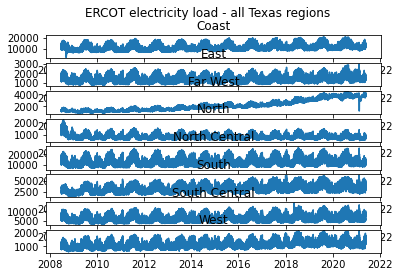

In [144]:
fig, axs = plt.subplots(8)
fig.suptitle('ERCOT electricity load - all Texas regions')
axs[0].plot(ercot_hourly_df.index,ercot_hourly_df['Coast'])
axs[0].set_title("Coast")
axs[1].plot(ercot_hourly_df.index,ercot_hourly_df['East'])
axs[1].set_title("East")
axs[2].plot(ercot_hourly_df.index,ercot_hourly_df['Far West'])
axs[2].set_title("Far West")
axs[3].plot(ercot_hourly_df.index,ercot_hourly_df['North'])
axs[3].set_title("North")
axs[4].plot(ercot_hourly_df.index,ercot_hourly_df['North Central'])
axs[4].set_title("North Central")
axs[5].plot(ercot_hourly_df.index,ercot_hourly_df['South'])
axs[5].set_title("South")
axs[6].plot(ercot_hourly_df.index,ercot_hourly_df['South Central'])
axs[6].set_title("South Central")
axs[7].plot(ercot_hourly_df.index,ercot_hourly_df['West'])
axs[7].set_title("West")

In [145]:
ercot_hourly_coast = ercot_hourly_df['Coast']

In [148]:
ercot_hourly_coast.head()

Hour_Ending_Naive
2008-07-01 00:00:00    9656.662104
2008-07-01 01:00:00    9253.200129
2008-07-01 02:00:00    9018.471792
2008-07-01 03:00:00    9001.706612
2008-07-01 04:00:00    9367.267437
Name: Coast, dtype: float64

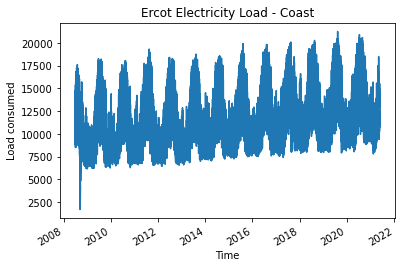

In [150]:
plt.figure(1)
plt.plot(ercot_hourly_coast)
plt.gcf().autofmt_xdate()
plt.title('Ercot Electricity Load - Coast')
plt.xlabel('Time')
plt.ylabel('Load consumed')
plt.show()

In [154]:
ercot_hourly_east = ercot_hourly_df['East']
ercot_hourly_east.head()

Hour_Ending_Naive
2008-07-01 00:00:00    1221.128539
2008-07-01 01:00:00    1172.281951
2008-07-01 02:00:00    1130.034847
2008-07-01 03:00:00    1088.946217
2008-07-01 04:00:00    1126.681443
Name: East, dtype: float64

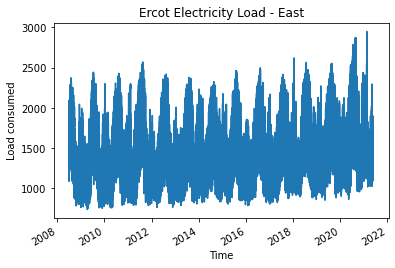

In [155]:
plt.figure(1)
plt.plot(ercot_hourly_east)
plt.gcf().autofmt_xdate()
plt.title('Ercot Electricity Load - East')
plt.xlabel('Time')
plt.ylabel('Load consumed')
plt.show()

In [156]:
ercot_hourly_far_west = ercot_hourly_df['Far West']
ercot_hourly_far_west.head()

Hour_Ending_Naive
2008-07-01 00:00:00    1178.877662
2008-07-01 01:00:00    1154.309255
2008-07-01 02:00:00    1136.704381
2008-07-01 03:00:00    1141.788394
2008-07-01 04:00:00    1153.770337
Name: Far West, dtype: float64

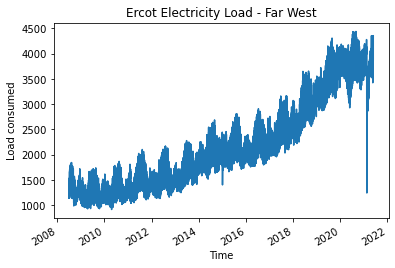

In [157]:
plt.figure(1)
plt.plot(ercot_hourly_far_west)
plt.gcf().autofmt_xdate()
plt.title('Ercot Electricity Load - Far West')
plt.xlabel('Time')
plt.ylabel('Load consumed')
plt.show()

In [158]:
ercot_hourly_north = ercot_hourly_df['North']
ercot_hourly_north.head()

Hour_Ending_Naive
2008-07-01 00:00:00    1050.738480
2008-07-01 01:00:00     991.552786
2008-07-01 02:00:00     951.264219
2008-07-01 03:00:00     933.279239
2008-07-01 04:00:00     960.153747
Name: North, dtype: float64

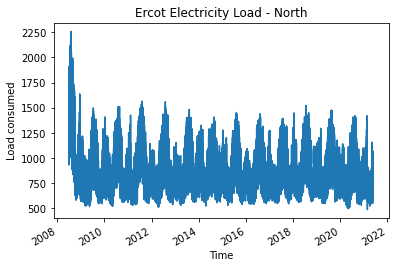

In [159]:
plt.figure(1)
plt.plot(ercot_hourly_north)
plt.gcf().autofmt_xdate()
plt.title('Ercot Electricity Load - North')
plt.xlabel('Time')
plt.ylabel('Load consumed')
plt.show()

In [160]:
ercot_hourly_north_central = ercot_hourly_df['North Central']
ercot_hourly_north_central.head()

Hour_Ending_Naive
2008-07-01 00:00:00    10468.390522
2008-07-01 01:00:00     9917.421758
2008-07-01 02:00:00     9574.525796
2008-07-01 03:00:00     9545.444648
2008-07-01 04:00:00     9908.325348
Name: North Central, dtype: float64

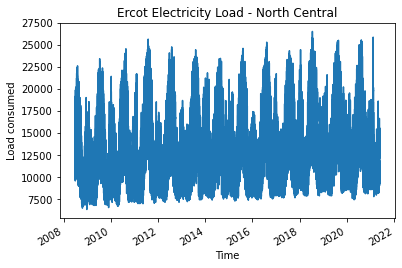

In [161]:
plt.figure(1)
plt.plot(ercot_hourly_north_central)
plt.gcf().autofmt_xdate()
plt.title('Ercot Electricity Load - North Central')
plt.xlabel('Time')
plt.ylabel('Load consumed')
plt.show()

In [162]:
ercot_hourly_south = ercot_hourly_df['South']
ercot_hourly_south.head()

Hour_Ending_Naive
2008-07-01 00:00:00    2574.735312
2008-07-01 01:00:00    2443.014223
2008-07-01 02:00:00    2360.807178
2008-07-01 03:00:00    2319.718486
2008-07-01 04:00:00    2355.301645
Name: South, dtype: float64

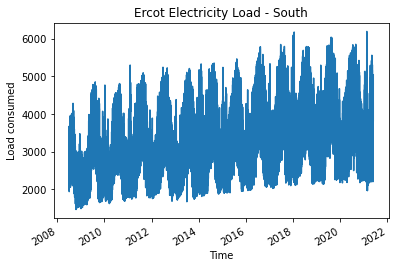

In [163]:
plt.figure(1)
plt.plot(ercot_hourly_south)
plt.gcf().autofmt_xdate()
plt.title('Ercot Electricity Load - South')
plt.xlabel('Time')
plt.ylabel('Load consumed')
plt.show()

In [164]:
ercot_hourly_south_central = ercot_hourly_df['North Central']
ercot_hourly_south_central.head()

Hour_Ending_Naive
2008-07-01 00:00:00    10468.390522
2008-07-01 01:00:00     9917.421758
2008-07-01 02:00:00     9574.525796
2008-07-01 03:00:00     9545.444648
2008-07-01 04:00:00     9908.325348
Name: North Central, dtype: float64

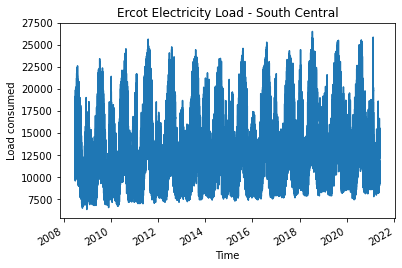

In [165]:
plt.figure(1)
plt.plot(ercot_hourly_south_central)
plt.gcf().autofmt_xdate()
plt.title('Ercot Electricity Load - South Central')
plt.xlabel('Time')
plt.ylabel('Load consumed')
plt.show()

In [166]:
ercot_hourly_west = ercot_hourly_df['West']
ercot_hourly_west.head()

Hour_Ending_Naive
2008-07-01 00:00:00    829.419681
2008-07-01 01:00:00    798.814534
2008-07-01 02:00:00    774.195122
2008-07-01 03:00:00    763.004208
2008-07-01 04:00:00    780.990754
Name: West, dtype: float64

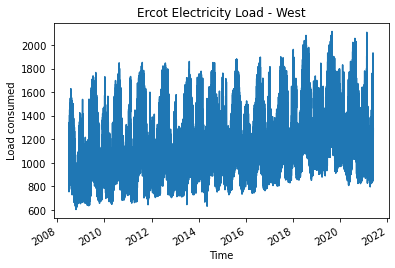

In [167]:
plt.figure(1)
plt.plot(ercot_hourly_west)
plt.gcf().autofmt_xdate()
plt.title('Ercot Electricity Load - West')
plt.xlabel('Time')
plt.ylabel('Load consumed')
plt.show()